In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### 1. Data Description

The data consisted of two files: players and sessions. There are 196 observations in the players data, which contain descriptive characteristics of each participant. The following list contains a description of the 7 variables included in the data: 

   - experience (chr) - Categorizes participants based on level of experience playing video games
   - hashedEmail (chr) - Hashed version of participants' emails
   - name (chr) - Participants' first names
   - gender(chr) - Gender participant identifies with
   - played_hours (dbl) - Total number of hours spent playing on the Minecraft server
   - Age (dbl) - Participant's age in years 
   - subscribe (lgl) - Whether they are subscribed to the game-related newsletter

The second data file, sessions, included 3 variables: 

   - hashedEmail (chr) - the hashed version of the participant's email 
   - start_time (chr) - the time the participant started playing on the server, in dd/mm/yyyy format
   - end_time (chr) - the time the participant stopped playing, in dd/mm/yyyy
    
There are also two more columns, representing the start and end times in Unix form to give a numerical (dbl) data type: 

  - original_start_time (dbl) - time player started playing in Unix time (milliseconds after Unix Epoch)
  - original_end_time (dbl) - time player finished session in Unix time (milliseconds after Unix Epoch)
    
Since the session start time and end time variable is separated over 2 columns each, the data is untidy, and we should exclude one measure of time when we start to make the model. Which one we exclude will depend on the type of predictive question we are trying to answer (eg, the Unix time will be more useful for regression-type questions, since time is numerical and ordered, therefore easier to do calculations). This data has 1535 observations, meaning there were 1535 total gaming sessions logged onto the Minecraft server as data for this investigation. 

Summary statistics were calculated for total played hours and session length in minutes (calculated by subtracting original_start_time from original_end_time, then dividing by 60,000 to convert seconds to minutes). The maximum session length from the data is 333.33 minutes, while the minimum is zero. Average session length was 48.49 minutes. The minimum total played hours is 0, the maximum 223.1 hours, and the average 5.85 hours. This means there is a large range of total hours spent on the game. This suggests that looking for differences in characteristics of players who spent a lot of time vs little time on the game may be fruitful. 

One potential issue with this data is the length of the observations of the hashed email variable, as each cell contains a long string of numbers and letters. However, this could be fixed by grouping them by the same hashed email and assigning a shorter name to each (eg, a number). Another less obvious issue may be in the way the data was collected, which is by setting up a Minecraft server where data is measured while they navigate the world. For example, players could be in the server but not playing, as there aren't any measures about the type of play once inside the server. This could skew the time component and not reflect the true values of time actually spent playing the game. Furthermore, since many variables are self-reported, they are prone to bias (eg, the experience variable in the players data). 


In [6]:
players<- read_csv("data/players.csv")
sessions<- read_csv("data/sessions.csv")
head(players)
head(sessions)

players_summary_statistics<- players|> 
    summarise(min_played_hours = min(played_hours),
              max_played_hours = max(played_hours),
              mean_played_hours=mean(played_hours))

sessions_summary_statistics<- sessions|> 
    mutate(time_played = original_end_time-original_start_time)|>
    summarize(min_session_time=min(time_played, na.rm=TRUE),
              max_session_time=max(time_played, na.rm=TRUE),
              mean_session_time=mean(time_played, na.rm=TRUE))|> 
    mutate(min_session_time=min_session_time/60000,
           max_session_time=max_session_time/60000, 
           mean_session_time=mean_session_time/60000)

players_summary_statistics
sessions_summary_statistics

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>
0,223.1,5.845918


min_session_time,max_session_time,mean_session_time
<dbl>,<dbl>,<dbl>
0,333.3333,48.4888


#### 2. The Predictive Question
    
The broad question I chose is question 2: *Which "kinds" of players are most likely to contribute a large amount of data?* This is so that in the future, the researchers can target those players in their recruiting efforts. The specific question within this broad question that I chose to investigate is: *Can gaming experience predict total hours played on the Minecraft server in the players dataset?*. I chose this question because I noticed a large difference between the minimum and maximum total hours played on the Minecraft server, showing a large range between different players. Therefore, I wanted to see if different characteristics of the players could account for this difference in the amount of data each player contributed. Specifically, I assumed that the less experienced a player was, the more hours of data they would spend playing and contribute as data, as they would need more time to navigate the world; therefore, I chose experience as the predictive variable to see if this would be true. This would address whether more or less experience determines the likelihood of contributing a large amount of data, which aligns with the broad question above. I will wrangle the data by using select and pulling out the two variables of interest (experience and hours_played. Then I will have to split the data into training and testing sets, using likely a 75% proportion for training, and 25% for testing. The model will be built using the training set and evaluated using the testing set. 

#### 3. exploration
Provided below are the first 6 rows of the players data (which is the data set of interest) and the calculated mean values of the quantitative variables in the data set (Age (21.14 yrs) and total number of hours spent on the Minecraft server (5.85h).


In [37]:
head(players)
players_quantitative_averages<- players|> 
    summarise(mean_played_hours=mean(played_hours), mean_age = mean(Age, na.rm=TRUE))
players_quantitative_averages

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


To further explore the relationship between player characteristics and amount of data they contribute (via total hours spent on server), below is a plot of experince against played hours. The plot shows that there is on average a significant difference in the mean hours of data that participants in each experince category contributed. Particularly, the regular experience group and the amateur group played for much longer than the other three groups. This suggests that it could indeed be possible to make a regression model which predicts the number of hours a participant will contribute, based on thier experince level category. 

experience,mean_played_hours
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


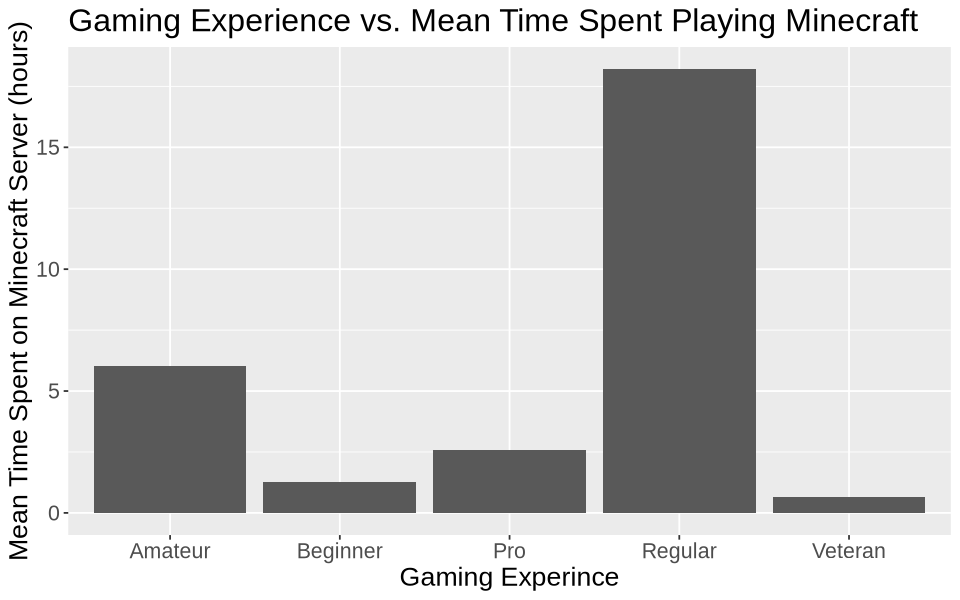

In [38]:
played_hours_averages_by_experince<- players |> 
    group_by (experience) |>
    summarize (mean_played_hours = mean(played_hours))
played_hours_averages_by_experince

options(repr.plot.width = 8, repr.plot.height = 5)
experience_hours_plot<- played_hours_averages_by_experince|> 
    ggplot(aes(x=experience, y=mean_played_hours))+
    geom_bar(stat="identity") +
    labs (x = "Gaming Experince",
          y = "Mean Time Spent on Minecraft Server (hours)",
          title = "Gaming Experience vs. Mean Time Spent Playing Minecraft") +
    theme(text = element_text(size=16))
experience_hours_plot

Furthermore, a plot was made to see if there is a relationship between the other player characteriscs and experince, namely age. This could tell us weather age is correlated with and may predict experience, meaning it would also be correlated with hours played. The plot demonstrates that although age may be correlated with a high number of hours played, this is only true for certain ages in the 10s to 20s range. There is not much correlation between these two variables for other age groups. However, this may also be skewed due to the demographics of the same group being mostly young people or university students. This plot has affirmed that age may not be a good predictor for hours played and for building our model. 

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


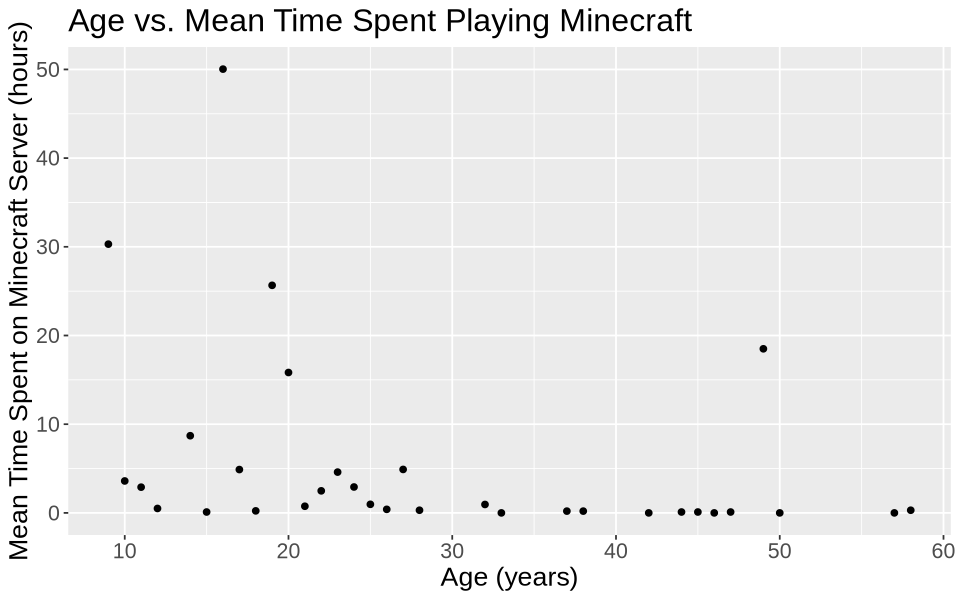

In [43]:
played_hours_averages_by_age<- players |> 
    group_by (Age) |>
    summarize (mean_played_hours = mean(played_hours))

options(repr.plot.width = 8, repr.plot.height = 5)
experience_age_gender_plot<- played_hours_averages_by_age|> 
    ggplot(aes(x=Age, y=mean_played_hours))+
    geom_point(stat="identity") +
    labs (x = "Age (years)",
          y = "Mean Time Spent on Minecraft Server (hours)",
          title = "Age vs. Mean Time Spent Playing Minecraft") +
    theme(text = element_text(size=16))
experience_age_gender_plot

#### 4. method/plan
One method that could be used to address the question of interest is to create a k-nearest neighbour reggression model, with experince as a predictor for hours played. The best K will be selected using five fold  cross validation on the training set, and the completed model wil be evaluated on the testing set. A k-nn reggression is most fit 


Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.
- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model? For example: - Are you splitting the data? How? How many splits? What proportions - will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?
